In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

# IMPORTANT: Use a raw string (r"...") or double backslashes ("\\") for Windows paths
path = r"D:\Desktop\Duke 2025 Fall\CS 372\Final Project\Result both image and pt\gen_results\val_all.pt"

data = torch.load(path, map_location="cpu")   # keep it on CPU for inspection

print(type(data))
print(data.keys())   # should show dict_keys(['cloudy', 'clean', 'pred'])

clean  = data["clean"]
cloudy = data["cloudy"]
pred   = data["pred"]

print("clean:",  clean.shape,  clean.dtype)
print("cloudy:", cloudy.shape, cloudy.dtype)
print("pred:",   pred.shape,   pred.dtype)


<class 'dict'>
dict_keys(['cloudy', 'clean', 'pred'])
clean: torch.Size([2050, 4, 128, 128]) torch.float32
cloudy: torch.Size([2050, 4, 128, 128]) torch.float32
pred: torch.Size([2050, 4, 128, 128]) torch.float32


In [4]:
def to_vis(img):
    # Accepts (4,H,W) or (3,H,W);
    # -> If (T,4,H,W) take mean over time
    if img.ndim == 4:
        img = img.mean(dim=0)
    if img.ndim != 3:
        raise ValueError(f"Expected 3 dims after squeeze, got {img.ndim}")
    x = img[:3].detach().cpu().numpy()
    x = x.transpose(1, 2, 0)  # (H,W,C)
    x = x - x.min()
    x = x / (x.max() + 1e-6)
    return x

In [5]:
def visualize_from_pt(clean, cloudy, pred, idx=0):
    """
    Visualize one sample from the saved tensors.

    clean, cloudy, pred : (N, 4, H, W) tensors
    idx                 : which index to show (0 <= idx < N)
    """
    cloudy_vis = to_vis(cloudy[idx])   # (4,H,W) -> (H,W,3)
    clean_vis  = to_vis(clean[idx])
    pred_vis   = to_vis(pred[idx])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.title("Cloudy")
    plt.imshow(cloudy_vis)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Target Clean")
    plt.imshow(clean_vis)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Removal Output")
    plt.imshow(pred_vis)
    plt.axis("off")

    plt.show()


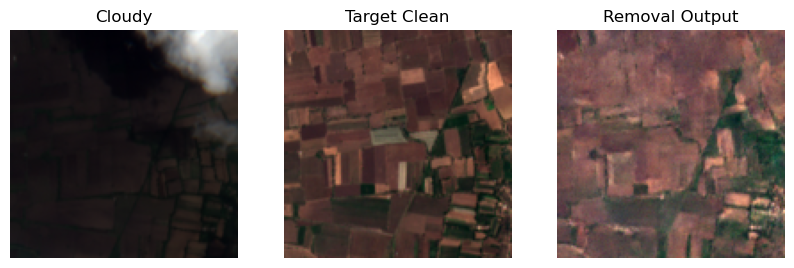

In [8]:
visualize_from_pt(clean, cloudy, pred, idx=2040)